In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')

In [3]:
filtered_data = data[data['CarDriver'] == 1]


In [4]:
target = filtered_data['Severity'].shift(-1)


In [5]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge_model = Ridge(solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)



In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=True)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

RMSE: 997.35
MAE: 19.51
R^2: 0.49


In [7]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 19.361133947428396
MAE: 13.252074011694937
R^2: 0.5468538741132394


In [9]:
import numpy as np

def index_of_agreement(y_true, y_pred):
    """
    Calculates the Index of Agreement between the true and predicted values.

    Args:
        y_true (array-like): The true values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The Index of Agreement.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Check if the arrays have the same shape
    assert y_true.shape == y_pred.shape, "Input arrays must have the same shape."

    # Calculate the mean of the true values
    y_true_mean = np.mean(y_true)

    # Calculate the numerator and denominator terms
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - y_true_mean) + np.abs(y_true - y_true_mean)))

    # Calculate the Index of Agreement
    ioa = 1 - (numerator / denominator)

    return ioa

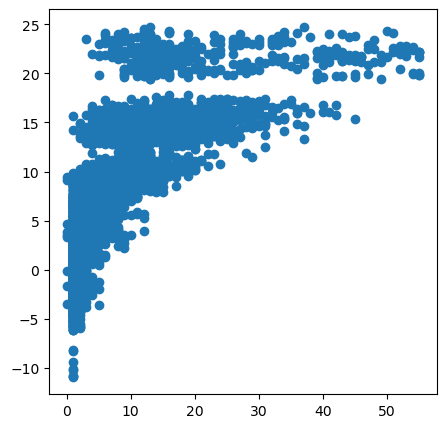

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

# CarPngr

In [9]:
filtered_data2 = data[data['CarPngr'] == 1]


In [10]:
target = filtered_data2['Severity'].shift(-1)

In [11]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

## from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=True)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

RMSE: 141.09
MAE: 7.50
R^2: 0.35


In [12]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 8.285152858169424
MAE: 5.918115281522796
R^2: 0.3578086173987718


# Mtrcyclist

In [13]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
target = filtered_data3['Severity'].shift(-1)

In [14]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

## from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

RMSE: 27.28
MAE: 18.58
R^2: 0.48


In [15]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

# ... (بقیه کد شما) ...

ridge_model = Ridge(alpha=1.0, solver='lbfgs', positive=True)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

# Calculating Index of Agreement
def index_of_agreement(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    assert y_true.shape == y_pred.shape, "Input arrays must have the same shape."
    
    y_true_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - y_true_mean) + np.abs(y_true - y_true_mean)))
    
    ioa = 1 - (numerator / denominator)
    
    return ioa

ioa = index_of_agreement(y_test, y_pred)
print(f"Index of Agreement: {ioa:.2f}")

RMSE: 27.28
MAE: 18.58
R^2: 0.48
Index of Agreement: 0.78


In [16]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 18.671262808607004
MAE: 13.433436024850527
R^2: 0.49979159261833683


# Pedal cyclist Regrasion


In [17]:
filtered_data4 = data[data['PdlCyclist'] == 1]
target = filtered_data4['Severity'].shift(-1)

In [18]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

## from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

RMSE: 22.06
MAE: 14.09
R^2: 0.32


In [19]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 14.073270851109768
MAE: 9.753570651346186
R^2: 0.3177145906583826


# Pedestrian

In [20]:
filtered_data5 = data[data['Pedestrian'] == 1]
target = filtered_data5['Severity'].shift(-1)

In [21]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

## from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

RMSE: 13.50
MAE: 9.31
R^2: 0.39


In [22]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 11.623534127468849
MAE: 8.151005210754736
R^2: 0.3828828366089525


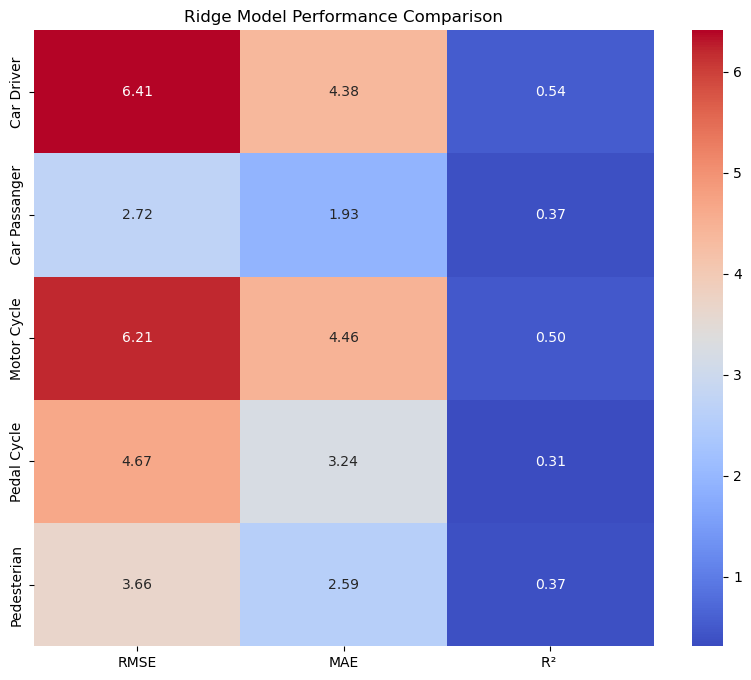

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید که مقادیر MSE، MAE و R² برای هر پنج مدل را دارید
mse_values = [6.41, 2.72 , 6.21 , 4.67, 3.66]
mae_values = [4.38, 1.93 ,4.46 ,3.24,  2.59]
r2_values = [0.54, 0.37 ,0.50 , 0.31 ,  0.37]

# ایجاد داده‌ها برای هیت مپ
metrics = ['Car Driver', ' Car Passanger ', 'Motor Cycle', 'Pedal Cycle', 'Pedesterian']
models = ['RMSE', 'MAE', 'R² ']
data = np.array([mse_values, mae_values, r2_values]).T
#metrics
# ایجاد هیت مپ
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data, annot=True, fmt='.2f', xticklabels=models, yticklabels=metrics, cmap='coolwarm')
heatmap.set_title('Ridge Model Performance Comparison')

plt.show()

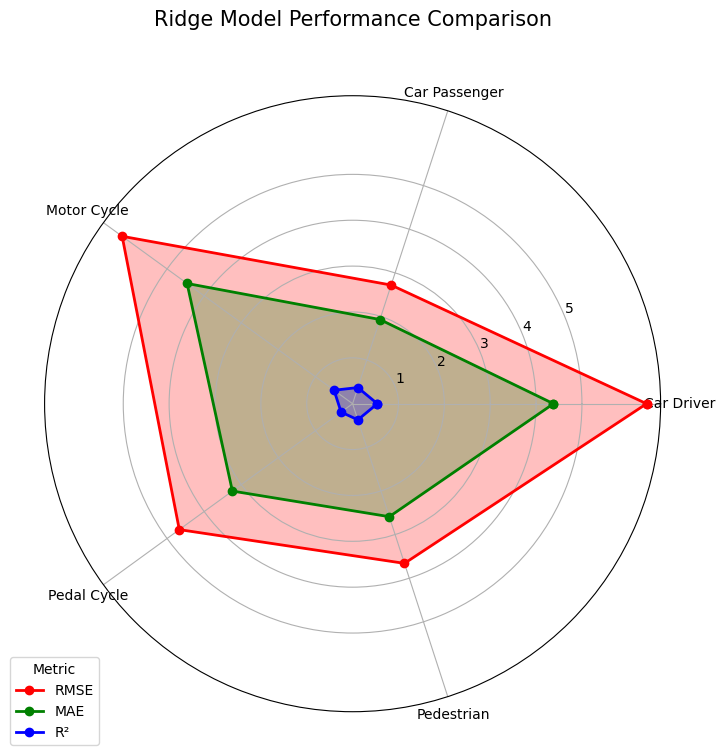

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
mse_values = [6.41, 2.72 , 6.21 , 4.67, 3.66]
mae_values = [4.38, 1.93 ,4.46 ,3.24,  2.59]
r2_values = [0.54, 0.37 ,0.50 , 0.31 ,  0.37]

# نام مدل‌ها
labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# تعداد متغیرها
num_vars = data.shape[1]

# تقسیم دایره به بخش‌های مساوی
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # بستن دایره

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# رنگ‌ها برای هر معیار
colors = ['red', 'green', 'blue']
labels_metric = ['RMSE', 'MAE', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  # بستن دایره
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=0.25, color=color)

ax.set_xticks(angles[:-1])  # تنظیم موقعیت برچسب‌ها
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  # تنظیم مقیاس محور y
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('Ridge Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

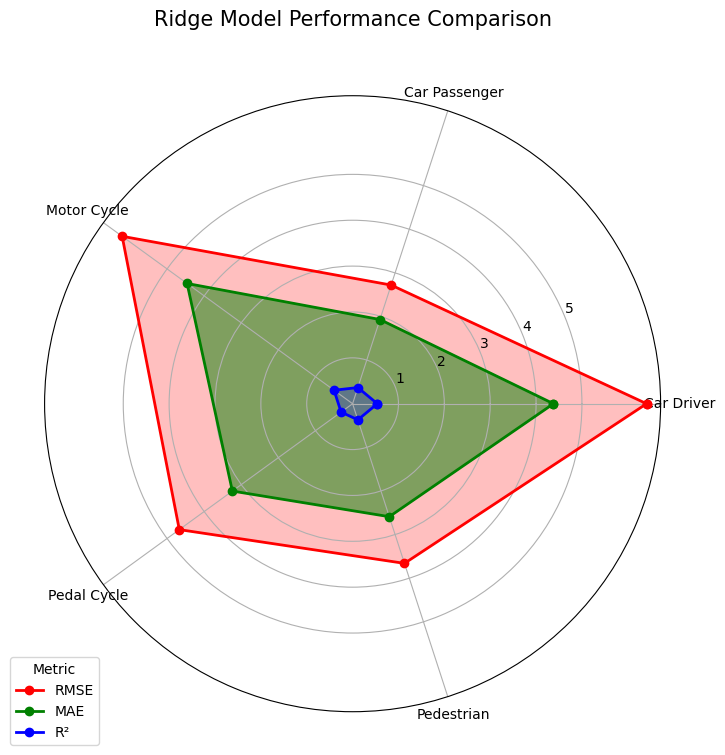

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
mse_values = [6.41, 2.72 , 6.21 , 4.67, 3.66]
mae_values = [4.38, 1.93 ,4.46 ,3.24,  2.59]
r2_values = [0.54, 0.37 ,0.50 , 0.31 ,  0.37]

# نام مدل‌ها
labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# تعداد متغیرها
num_vars = data.shape[1]

# تقسیم دایره به بخش‌های مساوی
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # بستن دایره

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# رنگ‌ها برای هر معیار
colors = ['red', 'green', 'blue']
labels_metric = ['RMSE', 'MAE', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  # تنظیم شفافیت برای MAE
    else:
        alpha_value = 0.25  # تنظیم شفافیت برای سایر معیارها
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  # بستن دایره
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  # تنظیم موقعیت برچسب‌ها
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  # تنظیم مقیاس محور y
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('Ridge Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
